In [1]:
import torch 
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
path_to_train='Train/'
path_to_test='Test/'
X_train=np.load(path_to_train+"X_train.npy")
Y_train=np.load(path_to_train+"Y_train.npy")
X_test=np.load(path_to_test+"X_test.npy")
Y_test=np.load(path_to_test+"Y_test.npy")

In [3]:
pd.array(Y_train).value_counts()

0    8564
1    4932
2    2873
4     480
3    2418
Name: count, dtype: Int64

<h1>Сбалансируем классы посредством ADASYN</h1>

In [7]:
from imblearn.over_sampling import ADASYN
nm = ADASYN() 
X_train, Y_train = nm.fit_resample(X_train, Y_train)
pd.array(Y_train).value_counts()

1    9140
3    9017
4    8610
0    8564
2    8431
dtype: Int64

In [4]:
def train(epoch, my_model):
    losses = []
    my_model.train()
    for batch_id, (X_batch, Y_batch) in enumerate(train_loader):
        optimizer.zero_grad() 
        output = my_model(X_batch)
        loss = loss_function(output, Y_batch)
        loss.backward()
        optimizer.step()
        if batch_id % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_id * len(X_batch), len(train_loader.dataset),
                100. * batch_id / len(train_loader), loss.item()))
        losses.append(loss.data.numpy())
    return np.mean(losses)

In [5]:
def test(my_model):
    my_model.eval()
    test_loss = 0
    correct = 0
    for X_batch, Y_batch in test_loader: 
        output = my_model(X_batch)
        test_loss += loss_function(output, Y_batch).data
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(Y_batch.data.view_as(pred)).cpu().sum()
        
    test_loss /= len(test_loader)
    acc = correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset), 100 * correct / len(test_loader.dataset)))
    return acc,test_loss

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
from torch.utils.data import TensorDataset, DataLoader

def print_confusion_matrix(model, X, Y):
    model.eval()
    y_pred = model(torch.Tensor(X)).data.numpy().argmax(axis = 1)
    print(confusion_matrix(Y, y_pred))
    accurancy = accurancy_score(Y, y_pred)
    print(f"Accurancy = {accurancy}")
    return accurancy

batch_size = 52
input_shape = X_train.shape[1]

X_train_tensor = torch.Tensor(X_train)
Y_train_tensor = torch.LongTensor(Y_train)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

X_test_tensor = torch.Tensor(X_test)
Y_test_tensor = torch.LongTensor(Y_test)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [7]:
input_shape

12000

<h1>Первая модель, используем 132 нейрона</h1>

In [8]:
model1=nn.Sequential()
model1.add_module("dense1",nn.Linear(input_shape,132))
model1.add_module("relu1",nn.ReLU())
model1.add_module("dense2",nn.Linear(132,132))
model1.add_module("relu2",nn.ReLU())
model1.add_module("dense3", nn.Linear(132,5))
model1.add_module("softmax",nn.Softmax(dim=1))

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters())

loss_train = []
loss_test = []
acc = []

for epoch in range(150):
    loss_train.append(train(epoch + 1, model1))
    _acc,_test_loss = test(model1)
    acc.append(_acc)
    loss_test.append(_test_loss)

Train Epoch: 1 [0/19267 (0%)]	Loss: 1.611241
Train Epoch: 1 [5200/19267 (27%)]	Loss: 1.502138


KeyboardInterrupt: 

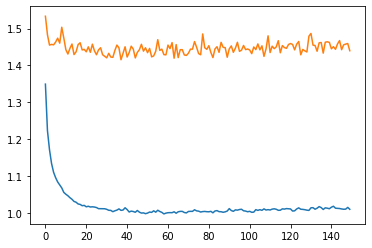

In [51]:
plt.plot(loss_train)
plt.plot(loss_test)
plt.show()

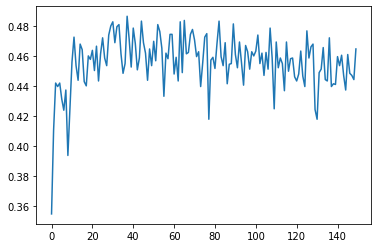

In [52]:
plt.plot(acc)
plt.show()

In [53]:
print('Acc: ', np.max(acc), 'Epoch: ', np.argmax(acc))

Acc:  0.48636153 Epoch:  37


<h1>132 Нейрона показали себя неплохо попробуем улычшить реузьтат </h1>

In [63]:
model2=nn.Sequential()
model2.add_module("dense1",nn.Linear(input_shape,132))
model2.add_module("bn1", nn.InstanceNorm1d(132))
model2.add_module("relu1",nn.ReLU())
model2.add_module("dense2",nn.Linear(132,132))
model2.add_module("relu2",nn.ReLU())
model2.add_module("dense3", nn.Linear(132,5))
model2.add_module("softmax",nn.Softmax(dim=1))

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters())

loss_train_sec = []
loss_test_sec = []
acc_sec = []

for epoch in range(150):
    loss_train_sec.append(train(epoch + 1, model2))
    _acc,_test_loss = test(model2)
    acc_sec.append(_acc)
    loss_test_sec.append(_test_loss)

Train Epoch: 1 [0/43762 (0%)]	Loss: 1.604551
Train Epoch: 1 [5200/43762 (12%)]	Loss: 1.347228
Train Epoch: 1 [10400/43762 (24%)]	Loss: 1.246885
Train Epoch: 1 [15600/43762 (36%)]	Loss: 1.277109
Train Epoch: 1 [20800/43762 (48%)]	Loss: 1.299403
Train Epoch: 1 [26000/43762 (59%)]	Loss: 1.323201
Train Epoch: 1 [31200/43762 (71%)]	Loss: 1.369839
Train Epoch: 1 [36400/43762 (83%)]	Loss: 1.253461
Train Epoch: 1 [41600/43762 (95%)]	Loss: 1.417346

Test set: Average loss: 1.4980, Accuracy: 843/2163 (38.97%)

Train Epoch: 2 [0/43762 (0%)]	Loss: 1.227103
Train Epoch: 2 [5200/43762 (12%)]	Loss: 1.188052
Train Epoch: 2 [10400/43762 (24%)]	Loss: 1.102155
Train Epoch: 2 [15600/43762 (36%)]	Loss: 1.329851
Train Epoch: 2 [20800/43762 (48%)]	Loss: 1.104025
Train Epoch: 2 [26000/43762 (59%)]	Loss: 1.223536
Train Epoch: 2 [31200/43762 (71%)]	Loss: 1.247366
Train Epoch: 2 [36400/43762 (83%)]	Loss: 1.132211
Train Epoch: 2 [41600/43762 (95%)]	Loss: 1.229840

Test set: Average loss: 1.4583, Accuracy: 935/216

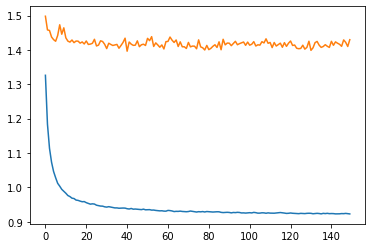

In [66]:
plt.plot(loss_train_sec)
plt.plot(loss_test_sec)
plt.show()

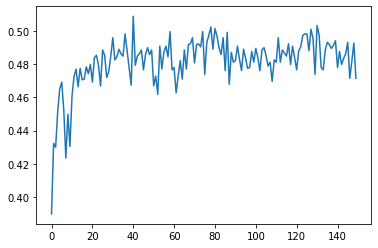

In [68]:
plt.plot(acc_sec)
plt.show()

In [70]:
print("Best accuracy: ",np.max(acc_sec)," Epoch: ", np.argmax(acc_sec))

Best accuracy:  0.50901526  Epoch:  40


<h1>Показатели обучения улудшились, теперь добавим Dropuot</h1>

In [72]:
model3=nn.Sequential()
model3.add_module("dense1",nn.Linear(input_shape,132))
model3.add_module("bn1",nn.BatchNorm1d(132))
model3.add_module("drop1", nn.Dropout(0.5))
model3.add_module("relu1",nn.ReLU())
model3.add_module("dense2",nn.Linear(132,132))
model3.add_module("relu2",nn.ReLU())
model3.add_module("dense3", nn.Linear(132,5))
model3.add_module("softmax",nn.Softmax(dim=1))

loss_function=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters())

loss_train_third=[]
loss_test_third=[]
acc_third=[]
for epoch in range(150):
    loss_train_third.append(train(epoch + 1,model3))
    _acc,_test_loss=test(model3)
    acc_third.append(_acc)
    loss_test_third.append(_test_loss)

Train Epoch: 1 [0/43762 (0%)]	Loss: 1.612492
Train Epoch: 1 [5200/43762 (12%)]	Loss: 1.461086
Train Epoch: 1 [10400/43762 (24%)]	Loss: 1.354929
Train Epoch: 1 [15600/43762 (36%)]	Loss: 1.386562
Train Epoch: 1 [20800/43762 (48%)]	Loss: 1.373922
Train Epoch: 1 [26000/43762 (59%)]	Loss: 1.400749
Train Epoch: 1 [31200/43762 (71%)]	Loss: 1.396150
Train Epoch: 1 [36400/43762 (83%)]	Loss: 1.334525
Train Epoch: 1 [41600/43762 (95%)]	Loss: 1.352679

Test set: Average loss: 1.5425, Accuracy: 738/2163 (34.12%)

Train Epoch: 2 [0/43762 (0%)]	Loss: 1.268852
Train Epoch: 2 [5200/43762 (12%)]	Loss: 1.264798
Train Epoch: 2 [10400/43762 (24%)]	Loss: 1.255378
Train Epoch: 2 [15600/43762 (36%)]	Loss: 1.377062
Train Epoch: 2 [20800/43762 (48%)]	Loss: 1.339944
Train Epoch: 2 [26000/43762 (59%)]	Loss: 1.344932
Train Epoch: 2 [31200/43762 (71%)]	Loss: 1.387282
Train Epoch: 2 [36400/43762 (83%)]	Loss: 1.142684
Train Epoch: 2 [41600/43762 (95%)]	Loss: 1.307668

Test set: Average loss: 1.4674, Accuracy: 909/216

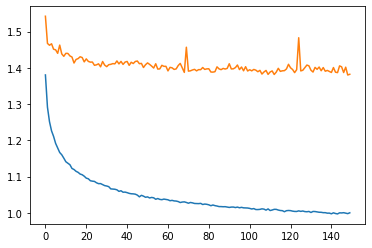

In [73]:
plt.plot(loss_train_third)
plt.plot(loss_test_third)
plt.show()

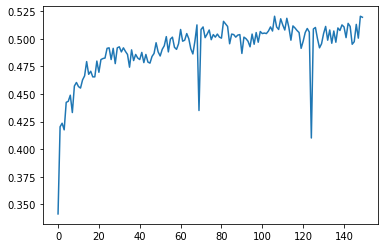

In [74]:
plt.plot(acc_third)
plt.show()

In [76]:
print("Best accuracy: ",np.max(acc_third)," Epoch: ", np.argmax(acc_third))

Best accuracy:  0.52057326  Epoch:  106


In [77]:
model4=nn.Sequential()
model4.add_module("dense1",nn.Linear(input_shape,132))
model4.add_module("bn1",nn.BatchNorm1d(132))
model4.add_module("drop1", nn.Dropout(0.5))
model4.add_module("relu1",nn.ReLU())
model4.add_module("dense2",nn.Linear(132,132))
model4.add_module("drop2", nn.Dropout(0.5))
model4.add_module("relu2",nn.ReLU())
model4.add_module("dense3", nn.Linear(132,5))
model4.add_module("softmax",nn.Softmax(dim=1))

loss_function=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters())


loss_train_th=[]
loss_test_th=[]
acc_th=[]
for epoch in range(150):
    loss_train_th.append(train(epoch + 1,model4))
    acc_,test_loss_=test(model4)
    acc_th.append(acc_)
    loss_test_th.append(test_loss_)

Train Epoch: 1 [0/43762 (0%)]	Loss: 1.606310
Train Epoch: 1 [5200/43762 (12%)]	Loss: 1.457968
Train Epoch: 1 [10400/43762 (24%)]	Loss: 1.523739
Train Epoch: 1 [15600/43762 (36%)]	Loss: 1.347957
Train Epoch: 1 [20800/43762 (48%)]	Loss: 1.404142
Train Epoch: 1 [26000/43762 (59%)]	Loss: 1.460703
Train Epoch: 1 [31200/43762 (71%)]	Loss: 1.309935
Train Epoch: 1 [36400/43762 (83%)]	Loss: 1.387255
Train Epoch: 1 [41600/43762 (95%)]	Loss: 1.324708

Test set: Average loss: 1.5296, Accuracy: 764/2163 (35.32%)

Train Epoch: 2 [0/43762 (0%)]	Loss: 1.331031
Train Epoch: 2 [5200/43762 (12%)]	Loss: 1.429267
Train Epoch: 2 [10400/43762 (24%)]	Loss: 1.219521
Train Epoch: 2 [15600/43762 (36%)]	Loss: 1.416403
Train Epoch: 2 [20800/43762 (48%)]	Loss: 1.244804
Train Epoch: 2 [26000/43762 (59%)]	Loss: 1.445057
Train Epoch: 2 [31200/43762 (71%)]	Loss: 1.261642
Train Epoch: 2 [36400/43762 (83%)]	Loss: 1.300991
Train Epoch: 2 [41600/43762 (95%)]	Loss: 1.442741

Test set: Average loss: 1.5144, Accuracy: 810/216

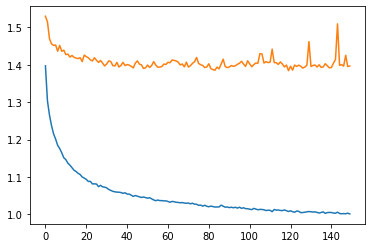

In [78]:
plt.plot(loss_train_th)
plt.plot(loss_test_th)
plt.show()


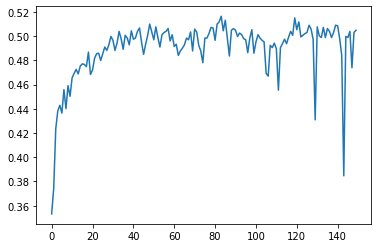

In [79]:
plt.plot(acc_th)
plt.show()

In [80]:
print("Best accuracy: ",np.max(acc_third)," Epoch: ", np.argmax(acc_third))

Best accuracy:  0.52057326  Epoch:  106
